# Linear Regression

This is my attempt to implement Linear Regression using Python3 and Numpy. I was inspired to do this work after having taken [Andrew Ng's Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning). Most of the equations used herein come from his course notes. Also, most of the work here is implemented in vectorized form.

The objective of linear regression is to optimize the linear regression parameters $\theta$ to the dataset of interest. One way of doing that is by using *gradient descent*. Central to gradient descent implementation is minimization of the **cost function**.

### Hypothesis
The *hypothesis* $\hat{y}$ for the linear model is:

$\hat{y} = \theta^{T}x$

### Cost function
The cost function $J(\theta)$ for dataset with $m$ samples and $n$ features can be evaluated as:

$J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)^2$

### Gradient of the cost function
$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)x_j^i$

**Note**, the superscript $i$ on the $x_j$ term at the end is an index label (not exponent). I do this for brevity - to avoid having to use prenthesis around the $i$ index labels as Andrew Ng does in his notes (the standard way). Also a reminder that the $j$ and $i$ are index elements of $m$ and $n$, respectively.

### Gradient Descent
At every step of the *gradient descent*, the parameters $\theta$ is updated as:

$\theta_j = \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)x_j^i$

to achieve the lowest cost $J(\theta)$. **Note**. $\alpha$ here is the *learning rate* and, the second term is simply the *gradient of the cost function* multiplied by the learning rate. This is where the method gets its name.

### Exact Solution
The Normal Equation (closed-form solution) for linear regression is: $\theta = \left(X^TX\right)^{-1}X^Ty$

## Regularization
For *regularized* linear regression, the cost function is updated by adding extra damping terms. In Ridge Regression, the regularized cost

$J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)^2 + \frac{\lambda}{2m} \sum\limits_{j=1}^{n} \theta_j^2$

Here, $\lambda$ is the regularization parameter and the bias term $\theta_0$ is not regularized.

The regularized gradient is: $\frac{\partial J(\theta)}{\partial \theta_j} = \left(\frac{1}{m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)x_j \right) + \frac{\lambda}{m}\theta_j$

Again, since the bias is not regularized, the last term in the gradient applies only to features other than the bias.

### Exact Solution
The Normal Equation (closed-form solution) for regularized linear regression is:

$\theta = \left(X^TX+ \lambda I \right)^{-1}X^Ty$

The *I* here is the identity matrix (n by n including the bias feature).

## Model Implementation

In [1]:
# import modules
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# matplotlib plot settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('lines', linewidth=2.5)

In [2]:
# Utility Functions
def featureNormalize(X):
    '''
    Feature scaling such that each feature in the normalized X
    has mean of 0 and standard deviation of 1.  
    '''
    X_mean = np.mean(X) # mean
    X_std = np.std(X) # standard deviation
    X_norm = (X - X_mean) / X_std # feature scaling
    return X_norm, X_mean, X_std


def closedFormSolution(X, y, reg=0):
    '''
    Normal equation (closed-form) solution of linear regression 
    '''
    m, n = X.shape
    I = np.eye((n))
    return np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y


def plotData(X, y, y_preds=False):
    plt.plot(X, y, 'bx')
    if isinstance(y_preds, np.ndarray): # predictions from model.predict
        plt.plot(X, y_preds, 'r-')
    plt.xlabel("X")
    plt.ylabel("y")
    
    
def plotCostHistory(costs):
    plt.plot(costs, 'r-')
    plt.xlabel("iterations")
    plt.ylabel("cost")

In [3]:
class myLinearRegression():
    '''
    My implementation of Linear Model Gradient Descent
    '''
    def __init__(self, lr=0.1, reg=0):
        self.lr = lr # learning rate
        self.reg = reg # regularization parameter
        
    def _costFunc(self, y, h):
        '''
        Linear model cost function
        '''
        return 1/len(y) * np.sum(np.power(h - y, 2)) # element-wise
    
    def _gradient(self, X, y, h):
        '''
        Linear model gradient (of the cost function)
        '''
        return 1/len(y) * X.T @ (h - y)
    
    def gradient_descent(self, X, y, tol=1e-5):
        '''
        Gradient Descent to train linear regression model.
        It is assumed that X already includes the bias term.
        '''
        # initialize
        # the "self" designation allows model.costs or model.theta access after fit
        self.theta = np.zeros(shape=(X.shape[1], 1)) # column for each feature
        self.costs = []
        
        while True:
            h = X @ self.theta
            cost = self._costFunc(y, h)
            self.costs.append(cost)
            gradients = self._gradient(X, y, h)
            new_Theta = self.theta - self.lr * gradients
            
            if np.sum(abs(new_Theta - self.theta)) < tol:
                break # stopping condition met
                
            self.theta = new_Theta # update Theta

    
    def predict(self, X):
        '''
        Linear model predictions
        '''
        return X @ self.theta # predictions

### Training

Xb shape: (30, 2)
y shape: (30, 1)


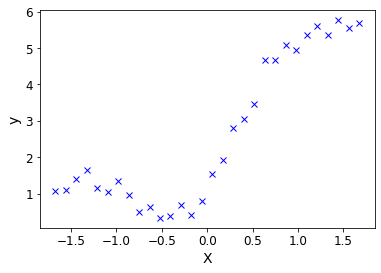

In [4]:
np.random.seed(42) # make reproducible
nSamples = 30 # sample size
X = np.linspace(1.0, 10.0, nSamples)[:, np.newaxis]
y = np.sin(X) + 0.1*np.power(X, 1.8) + 0.25*np.random.randn(nSamples, 1)
X = featureNormalize(X)[0] # feature scale

plotData(X, y, y_preds=False) # visualize data

Xb = np.c_[np.ones((nSamples, 1)), X] # add bias (X0) with ones

print(f"Xb shape: {Xb.shape}\ny shape: {y.shape}") # check if shapes are as intended

In [5]:
model = myLinearRegression(lr=0.1)
model.gradient_descent(Xb, y, tol=1e-5)
costs, theta = model.costs, model.theta
print(f"theta (optimized):\n {theta}\n")
print(f"theta (closed-form):\n {closedFormSolution(Xb, y)}")

theta (optimized):
 [[2.62898128]
 [1.75030854]]

theta (closed-form):
 [[2.62903784]
 [1.7503462 ]]


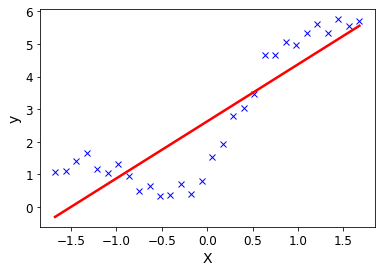

In [6]:
y_preds = model.predict(Xb)
plotData(X, y, y_preds=y_preds)

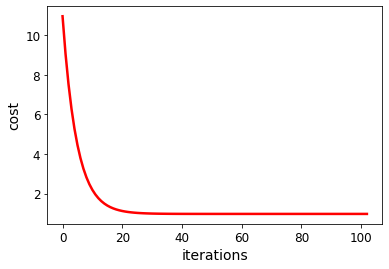

In [7]:
plotCostHistory(costs)

### Selecting learning rate

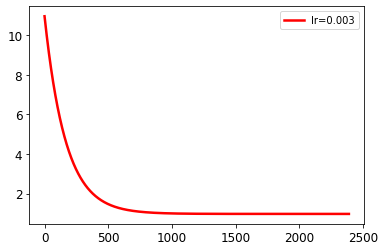

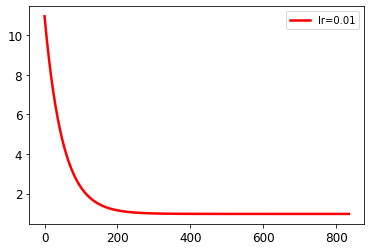

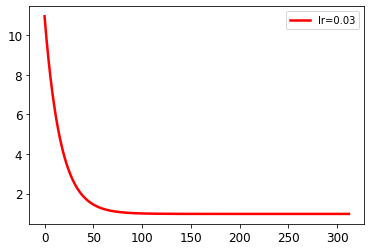

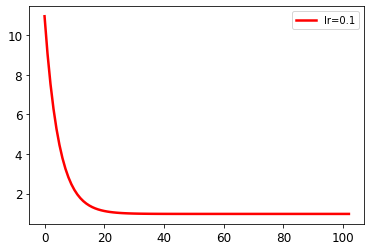

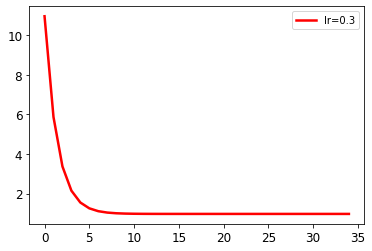

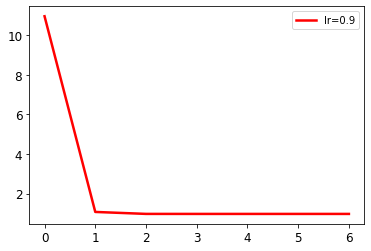

In [8]:
lrs = [0.003, 0.01, 0.03, 0.1, 0.3, 0.9]
#plt.figure() # all curves in same plot
#from cycler import cycler
#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])
#                   + cycler('linestyle', ['-', '--', ':', '-.'])))

for lr in lrs:
    model = myLinearRegression(lr=lr)
    model.gradient_descent(Xb, y, tol=1e-5)
    costs, theta = model.costs, model.theta
    plt.figure() # separate plot for each learning rate
    plt.plot(costs, 'r-', label=f"lr={lr}")
    plt.legend()

The smaller learning rates took too long to optimize while the large learning rate (0.9) failed to give a smooth curve. The learning rates in the 0.1-0.3 range seem reasonable.